# MODIS spatial autocorrelation



In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pysal
import numpy as np
from scipy.spatial import distance_matrix
import libpysal
from esda.moran import Moran


# Import MODIS data for one square
sq1 =pd.read_csv("../data/modis_pasture_A2018_square1.csv")

In [22]:
# Distance bins
dist_bins = np.linspace(0.2,8,10)*1000
moran_I = np.zeros(dist_bins.shape)

In [23]:
# Calculate distances between points
xy_pairs = sq1.iloc[:,0:2]
dist_pairwise = distance_matrix(xy_pairs, xy_pairs,2)

In [24]:
# Calculate Moran's I for each distance class
for i in range(len(dist_bins)):
    if (i+1==len(dist_bins)):
      ind = np.where(dist_pairwise>=dist_bins[i])
    else:
      ind = np.where((dist_pairwise>=dist_bins[i]) & (dist_pairwise<dist_bins[i+1]))

    moran_I[i] = np.corrcoef(sq1.evi[ind[0]], sq1.evi[ind[1]])[0,1]
        
    

Text(0,0.5,"Moran's I")

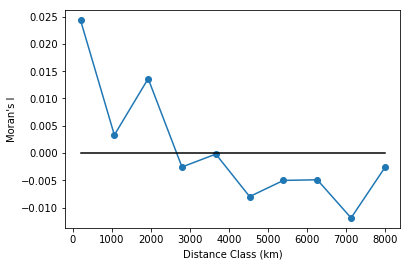

In [25]:
plt.plot(dist_bins, moran_I,'-o')
plt.plot(dist_bins, np.zeros(dist_bins.shape),'-k')
plt.xlabel('Distance Class (km)')
plt.ylabel('Moran\'s I')

In [16]:
i=0

In [17]:
ind = np.where((dist_pairwise>=dist_bins[i]) & (dist_pairwise<dist_bins[i+1]))

In [18]:
ind

(array([    0,     0,     0, ..., 18197, 18197, 18197]),
 array([    1,     6,     7, ..., 18194, 18195, 18196]))

In [19]:
dist_pairwise.shape

(18198, 18198)

In [20]:
sq1.shape

(18198, 12)